In [1]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=1
N=500

In [2]:
# Structral connectivity matrix

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

In [3]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [4]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0

In [5]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[4.23615580e+00 1.94521823e+00 6.27547921e-01 1.56071415e+00
 4.18521628e+00 2.91600996e+00 4.92244096e-01 9.13724926e-01
 7.03581608e-01 7.77395678e-01 4.43629111e+00 4.44955379e+00
 2.38104229e+00 9.85604125e-01 2.68790394e-01 1.02606251e+00
 4.10025138e-01 2.84217760e+00 2.48812680e+00 4.82112718e+00
 2.72728203e+00 2.12974031e+00 2.24723841e+00 3.15788222e+00
 3.36798908e+00 4.81970567e+00 8.78407619e-01 1.64842410e+00
 1.69472599e+00 3.68657952e+00 4.57545814e+00 2.06158367e+00
 3.79257923e-02 3.50998345e+00 3.58080054e+00 3.27914390e+00
 1.43865986e+00 2.44223296e+00 2.31792396e+00 3.43185438e+00
 2.29143120e+00 1.15894982e-01 3.30515750e+00 3.16506231e+00
 4.19559083e+00 1.44858446e+00 2.04882035e+00 3.12929148e+00
 6.33509712e-01 1.72098428e+00 4.17259828e+00 2.99482975e+00
 7.89380707e-01 4.08805420e+00 6.96742110e-01 7.88128864e-01
 7.96438870e-01 4.04549101e+00 7.70099145e-02 2.23907598e+00
 3.21035160e+00 2.05640176e+00 3.19799024e+00 1.62887668e+00
 1.10520099e+00 1.303884

In [6]:
gamma_term1=0
gamma_term2=0
for z in r_pattern[0]:
    gamma_term1=gamma_term1+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(f(phi(z))**2)
for z in r_pattern[0]:
    gamma_term2=gamma_term2+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(g(phi(z))**2)
gamma=A**2*gamma_term1*gamma_term2
print(gamma)

4.155917819754188


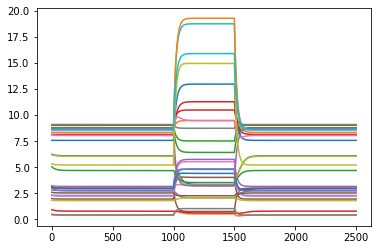

In [7]:
#Novel stimulus
t_p=150
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
alpha=p/N/c
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0

for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])

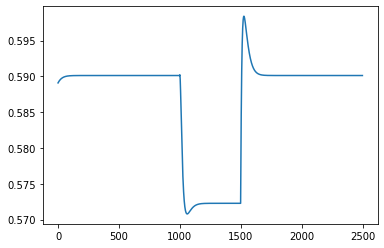

In [8]:
#Overlap
import scipy.stats
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)

-2.3067523956528577e-06
-2.3072913465689707e-06
-2.3078109328798123e-06
-2.3083118596049665e-06
-2.308794805568845e-06
-2.309260424400138e-06
-2.3097093454919927e-06
-2.310142174924474e-06
-2.310559496350839e-06
-2.3109618718490953e-06
-2.3113498427402576e-06
-2.311723930374593e-06
-2.3120846368872226e-06
-2.312432445924251e-06
-2.312767823340619e-06
-2.313091217870846e-06
-2.313403061773717e-06
-2.3137037714519656e-06
-2.3139937480479607e-06
-2.314273378016346e-06
-2.314543033674563e-06
-2.314803073732136e-06
-2.3150538437995326e-06
-2.315295676877496e-06
-2.3155288938275057e-06
-2.315753803824228e-06
-2.3159707047905917e-06
-2.3161798838162127e-06
-2.316381617559823e-06
-2.3165761726363296e-06
-2.3167638059890815e-06
-2.316944765248014e-06
-2.3171192890740864e-06
-2.3172876074907085e-06
-2.3174499422025325e-06
-2.317606506902188e-06
-2.317757507565394e-06
-2.317903142734917e-06
-2.3180436037938003e-06
-2.318179075228296e-06
-2.3183097348808734e-06
-2.3184357541937342e-06
-2.318557298

-2.321852550509826e-06
-2.3218525515697026e-06
-2.321852552589966e-06
-2.321852553572101e-06
-2.321852554517532e-06
-2.3218525554276285e-06
-2.3218525563037096e-06
-2.3218525571470474e-06
-2.3218525579588645e-06
-2.3218525587403405e-06
-2.3218525594926103e-06
-2.321852560216759e-06
-2.3218525609138435e-06
-2.3218525615848753e-06
-2.3218525622308235e-06
-2.3218525628526287e-06
-2.3218525634511943e-06
-2.321852564027385e-06
-2.3218525645820404e-06
-2.3218525651159655e-06
-2.321852565629932e-06
-2.3218525661246877e-06
-2.321852566600955e-06
-2.3218525670594153e-06
-2.321852567500746e-06
-2.3218525679255747e-06
-2.3218525683345298e-06
-2.3218525687281977e-06
-2.3218525691071534e-06
-2.321852569471945e-06
-2.3218525698231013e-06
-2.3218525701611335e-06
-2.3218525704865356e-06
-2.3218525707997705e-06
-2.3218525711013023e-06
-2.321852571391564e-06
-2.3218525716709773e-06
-2.321852571939947e-06
-2.3218525721988707e-06
-2.321852572448111e-06
-2.3218525726880415e-06
-2.321852572919005e-06
-2.321

-2.3218525788734658e-06
-2.321852578873467e-06
-2.3218525788734687e-06
-2.32185257887347e-06
-2.3218525788734717e-06
-2.321852578873474e-06
-2.321852578873475e-06
-2.321852578873475e-06
-2.3218525788734776e-06
-2.321852578873478e-06
-2.3218525788734797e-06
-2.3218525788734827e-06
-2.321852578873483e-06
-2.3218525788734844e-06
-2.321852578873486e-06
-2.321852578873489e-06
-2.32185257887349e-06
-2.3218525788734903e-06
-2.3218525788734907e-06
-2.3218525788734907e-06
-2.321852578873491e-06
-2.321852578873492e-06
-2.321852578873493e-06
-2.321852578873493e-06
-2.321852578873493e-06
-2.3218525788734933e-06
-2.321852578873495e-06
-2.3218525788734954e-06
-2.3218525788734954e-06
-2.3218525788734963e-06
-2.3218525788734967e-06
-2.3218525788734975e-06
-2.3218525788734975e-06
-2.321852578873498e-06
-2.321852578873498e-06
-2.3218525788734984e-06
-2.3218525788734984e-06
-2.3218525788734992e-06
-2.3218525788735005e-06
-2.3218525788735005e-06
-2.3218525788735018e-06
-2.3218525788735018e-06
-2.321852578

-2.74833706733622e-06
-2.749504700495524e-06
-2.7506200416998594e-06
-2.7516854238685696e-06
-2.752703076555576e-06
-2.7536751304680672e-06
-2.7546036217933037e-06
-2.7554904963410764e-06
-2.7563376135092728e-06
-2.7571467500795485e-06
-2.7579196038500174e-06
-2.758657797111634e-06
-2.7593628799745876e-06
-2.760036333550976e-06
-2.7606795729996404e-06
-2.7612939504389066e-06
-2.761880757732806e-06
-2.762441229155978e-06
-2.762976543942466e-06
-2.7634878287232507e-06
-2.7639761598572445e-06
-2.76444256566029e-06
-2.764888028536523e-06
-2.765313487016193e-06
-2.7657198377041e-06
-2.7661079371423155e-06
-2.7664786035910123e-06
-2.766832618730848e-06
-2.767170729290352e-06
-2.7674936486015205e-06
-2.7678020580867494e-06
-2.7680966086801156e-06
-2.7683779221857723e-06
-2.7686465925763315e-06
-2.7689031872337448e-06
-2.7691482481352186e-06
-2.7693822929866115e-06
-2.7696058163055545e-06
-2.769819290456532e-06
-2.7700231666400424e-06
-2.7702178758377955e-06
-2.7704038297159554e-06
-2.77058142

-2.7743496952096866e-06
-2.7743496953155056e-06
-2.7743496954165583e-06
-2.7743496955130646e-06
-2.7743496956052256e-06
-2.7743496956932395e-06
-2.7743496957772914e-06
-2.774349695857561e-06
-2.774349695934218e-06
-2.7743496960074235e-06
-2.7743496960773317e-06
-2.7743496961440982e-06
-2.7743496962078578e-06
-2.7743496962687476e-06
-2.7743496963268947e-06
-2.7743496963824287e-06
-2.7743496964354615e-06
-2.7743496964861043e-06
-2.7743496965344733e-06
-2.774349696580661e-06
-2.774349696624772e-06
-2.774349696666898e-06
-2.774349696707126e-06
-2.7743496967455445e-06
-2.7743496967822346e-06
-2.7743496968172713e-06
-2.7743496968507333e-06
-2.7743496968826855e-06
-2.774349696913206e-06
-2.7743496969423476e-06
-2.774349696970179e-06
-2.7743496969967597e-06
-2.7743496970221406e-06
-2.7743496970463814e-06
-2.7743496970695313e-06
-2.774349697091638e-06
-2.7743496971127494e-06
-2.7743496971329143e-06
-2.774349697152167e-06
-2.7743496971705573e-06
-2.774349697188117e-06
-2.7743496972048863e-06
-2.

-2.3219153007938966e-06
-2.321912965418875e-06
-2.3219107161844093e-06
-2.3219085499566214e-06
-2.3219064637134135e-06
-2.321904454540596e-06
-2.3219025196281424e-06
-2.3219006562665625e-06
-2.321898861843411e-06
-2.321897133839894e-06
-2.3218954698276043e-06
-2.3218938674653553e-06
-2.321892324496138e-06
-2.3218908387441538e-06
-2.3218894081119776e-06
-2.3218880305777973e-06
-2.3218867041927544e-06
-2.3218854270783687e-06
-2.321884197424058e-06
-2.321883013484738e-06
-2.3218818735785116e-06
-2.321880776084425e-06
-2.3218797194403068e-06
-2.321878702140688e-06
-2.3218777227347765e-06
-2.3218767798245263e-06
-2.3218758720627434e-06
-2.321874998151291e-06
-2.3218741568393152e-06
-2.321873346921583e-06
-2.3218725672368256e-06
-2.321871816666182e-06
-2.3218710941316744e-06
-2.321870398594737e-06
-2.3218697290548013e-06
-2.3218690845479387e-06
-2.321868464145534e-06
-2.321867866953021e-06
-2.321867292108644e-06
-2.3218667387822917e-06
-2.321866206174332e-06
-2.321865693514526e-06
-2.3218652

-2.321852578969382e-06
-2.3218525789658377e-06
-2.3218525789624245e-06
-2.3218525789591376e-06
-2.321852578955972e-06
-2.3218525789529242e-06
-2.321852578949987e-06
-2.321852578947162e-06
-2.3218525789444382e-06
-2.32185257894182e-06
-2.3218525789392925e-06
-2.3218525789368624e-06
-2.3218525789345203e-06
-2.3218525789322655e-06
-2.3218525789300933e-06
-2.3218525789280037e-06
-2.3218525789259903e-06
-2.321852578924052e-06
-2.321852578922183e-06
-2.321852578920385e-06
-2.3218525789186537e-06
-2.3218525789169876e-06
-2.3218525789153803e-06
-2.3218525789138332e-06
-2.3218525789123454e-06
-2.3218525789109093e-06
-2.321852578909526e-06
-2.3218525789081983e-06
-2.321852578906916e-06
-2.321852578905682e-06
-2.3218525789044943e-06
-2.3218525789033508e-06
-2.3218525789022467e-06
-2.321852578901186e-06
-2.3218525789001647e-06
-2.3218525788991783e-06
-2.3218525788982317e-06
-2.321852578897319e-06
-2.3218525788964386e-06
-2.321852578895594e-06
-2.3218525788947784e-06
-2.3218525788939928e-06
-2.3218

-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06
-2.3218525788735183e-06


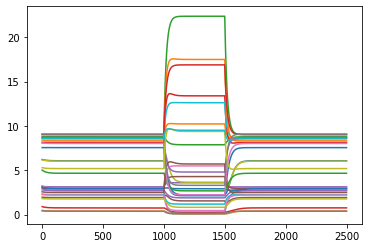

In [9]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0
m=np.zeros(t_max-t_p)
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    if t>t_p:
        q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
        M=1/N*np.sum(r[:,t]**2)
        q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
        M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
        R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
        m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
        print(m[t-t_p])
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
    R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
    print(m[t-t_p])
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    M_order=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N))))**2)
    R=np.sum(np.exp(-np.dot(xi_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.zeros((N,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),xi_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.zeros((N,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-xi_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(xi_pattern[0]))**2))
    print(m[t-t_p])
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])

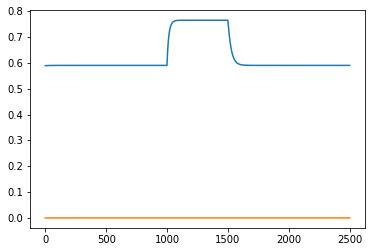

In [10]:
#Overlap
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.plot(range(0,t_max-t_p),m)